In [2]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from keras.utils import to_categorical
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC

Using TensorFlow backend.


               A_1    A_2    A_3    A_4    A_5  Y
title                                            
no_act_2(0) -0.823 -0.807 -0.806 -0.761 -0.765  0
no_act_2(1) -0.776 -0.813 -0.811 -0.780 -0.797  0
no_act_2(2) -0.788 -0.793 -0.804 -0.801 -0.834  0
no_act_2(3) -0.812 -0.808 -0.797 -0.822 -0.750  0
no_act_2(4) -0.750 -0.823 -0.820 -0.826 -0.759  0


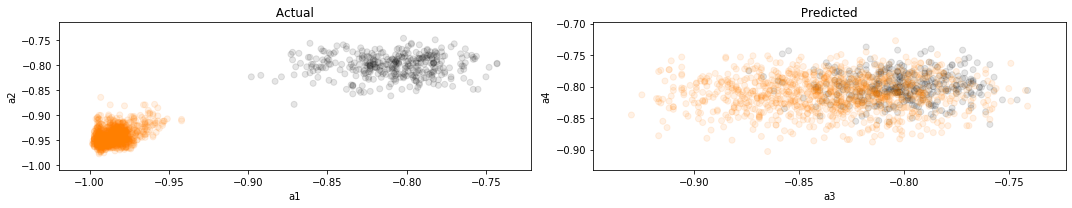

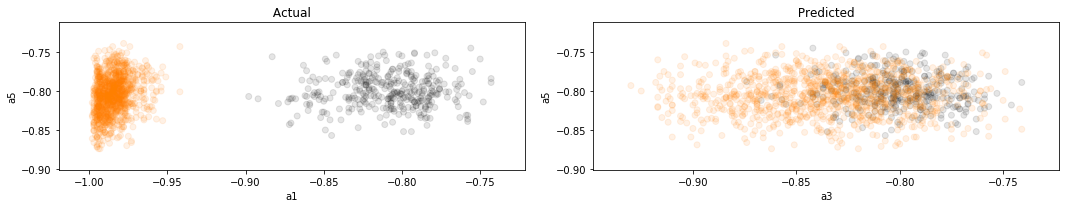

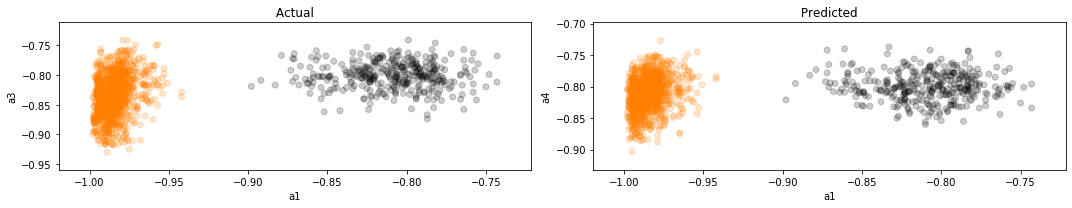

In [51]:
# Analysis !!!

data = pd.read_csv('SVM_features_1BHK_C.csv',index_col = 0)

print(data.head())



false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['A_1']]
a2 = data[['A_2']]

a3 = data[['A_3']]
a4 = data[['A_4']]

a5 = data[['A_5']]

colors = np.array(['#000000', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a5')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a5')
fig.tight_layout()





fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a4')
fig.tight_layout()

0 --blue-- > noactivity
1 --orange-> activity
accuracy:  1.0
precision:  1.0
recall:  1.0
f1:  1.0
area under curve (auc):  1.0
[[ 73   0]
 [  0 209]]


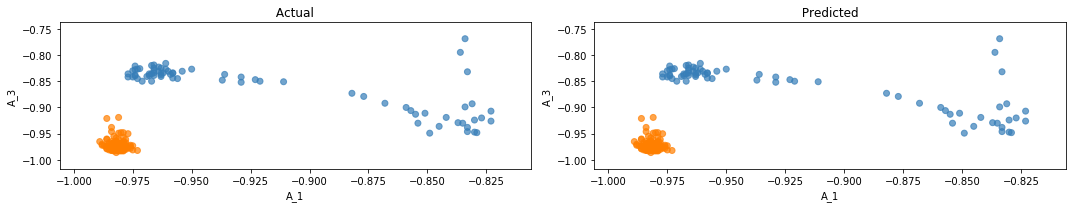

In [38]:
########################################################
'''
This is a single prediction !!!
'''


model = SVC(kernel='rbf')



train, test = train_test_split(data, test_size=.2) 


#train_normal = train[train['Y']==1] 
#train_outliers = train[train['Y']==0] 
#outlier_prop = len(train_outliers) / len(train_normal) 
#model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

model = SVC(kernel='rbf')

feature_list = ['A_2']

#feature_list = ['A_1','A_3']
#classifier = model.fit(train_normal[feature_list])


classifier = model.fit(train[feature_list], train['Y'])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

In [52]:
'''
The cross validation technique !!!!
'''

### k fold implementation ...
feature_list = ['A_2','A_3','A_4','A_5']


#feature_list = ['A_1','A_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    
    

    

    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...
----------------------------------------------------------------------
Training for fold 2 ...
----------------------------------------------------------------------
Training for fold 3 ...
----------------------------------------------------------------------
Training for fold 4 ...
----------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 100.0 -  Accuracy : 99.29078014184397%
------------------------------------------------------------------------
> Fold 2 - Precison: 100.0 -  Accuracy : 100.0%
------------------------------------------------------------------------
> Fold 3 - Precison: 99.50980392156863 -  Accuracy : 99.29078014184397%
--------------------------------------

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

                               BA_1   BA_2   CB_1   CB_2   AC_1   AC_2  Y
title                                                                    
no_act/input_noactivity_2(0)  2.171  1.912  6.639  6.533  6.686  6.343  0
no_act/input_noactivity_2(1)  2.081  1.925  6.826  6.293  6.777  6.218  0
no_act/input_noactivity_2(2)  2.046  1.823  6.464  5.955  6.397  6.044  0
no_act/input_noactivity_2(3)  1.957  1.820  6.847  5.989  6.859  6.065  0
no_act/input_noactivity_2(4)  1.937  1.820  6.922  6.522  6.834  6.422  0


"\n\nfig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))\n\naxes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) \naxes[0].title.set_text(' Actual ')\naxes[0].set_xlabel('a1')\naxes[0].set_ylabel('a3')\n\n\n#axes[0].label('Actual plot')\n\naxes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) \naxes[1].title.set_text(' Predicted ')\naxes[1].set_xlabel('a1')\naxes[1].set_ylabel('a4')\nfig.tight_layout()\n\n"

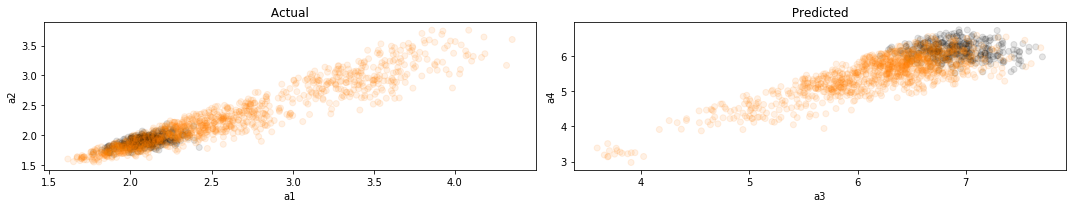

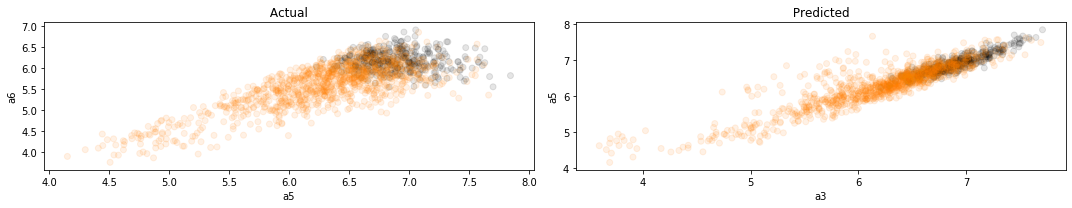

In [43]:
#######################################################################

## ANALYSIS FOR PHASE !!!

data = pd.read_csv('Phase_feat_1BHK_1.csv',index_col = 0)

print(data.head())

colors = np.array(['#000000', '#ff7f00']) 



false_set = data[data["Y"] == 0]
true_set = data[data["Y"] == 1]

a1 = data[['BA_1']]
a2 = data[['BA_2']]

a3 = data[['CB_1']]
a4 = data[['CB_2']]

a5 = data[['AC_1']]
a6 = data[['AC_2']]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a2, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a2')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a4, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a4')
fig.tight_layout()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a5,a6, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a5')
axes[0].set_ylabel('a6')


#axes[0].label('Actual plot')

axes[1].scatter(a3, a5, alpha=0.1, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a3')
axes[1].set_ylabel('a5')
fig.tight_layout()


'''

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(a1,a3, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('a1')
axes[0].set_ylabel('a3')


#axes[0].label('Actual plot')

axes[1].scatter(a1, a4, alpha=0.2, c=colors[(data['Y'] + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('a1')
axes[1].set_ylabel('a4')
fig.tight_layout()

'''



0 --blue-- > noactivity
1 --orange-> activity
accuracy:  0.7801418439716312
precision:  0.8864864864864865
recall:  0.8
f1:  0.841025641025641
area under curve (auc):  0.7636363636363637
[[ 56  21]
 [ 41 164]]


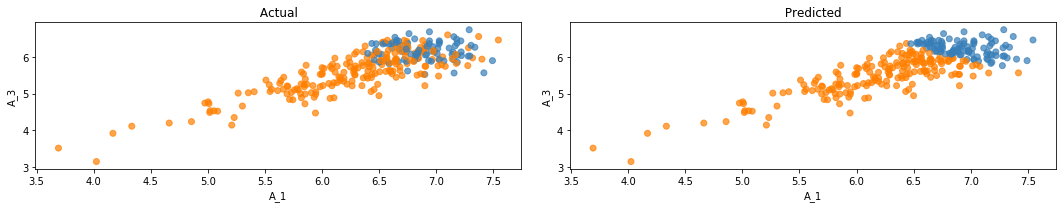

In [17]:
########################################################
'''
This is a single prediction !!!
'''

from sklearn.svm import SVC
model = SVC(kernel='rbf')



train, test = train_test_split(data, test_size=.2) 


#train_normal = train[train['Y']==1] 
#train_outliers = train[train['Y']==0] 
#outlier_prop = len(train_outliers) / len(train_normal) 
#model = svm.OneClassSVM(kernel='rbf', nu=outlier_prop, gamma=1000)

model = SVC(kernel='rbf')

feature_list = ['CB_1','CB_2']

#feature_list = ['A_1','A_3']
#classifier = model.fit(train_normal[feature_list])


classifier = model.fit(train[feature_list], train['Y'])
# <><><><><><><><><><><><><><><<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

x1 = test[[feature_list[0]]] 
x2 = test[[feature_list[0]]] 
y1 = test[[feature_list[1]]]
y2 = test[[feature_list[1]]]


y_pred = model.predict(test[feature_list]) 

for i in range(len(y_pred)):
  if (y_pred[i] == -1):
    y_pred[i] = 0



print('0 --blue-- > noactivity')
print('1 --orange-> activity')
colors = np.array(['#377eb8', '#ff7f00']) 

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

axes[0].scatter(x1,y1, alpha=0.7, c=colors[(test['Y'] + 1) // 2]) 
axes[0].title.set_text(' Actual ')
axes[0].set_xlabel('A_1')
axes[0].set_ylabel('A_3')


#axes[0].label('Actual plot')

axes[1].scatter(x2, y2, alpha=0.7, c=colors[(y_pred + 1) // 2]) 
axes[1].title.set_text(' Predicted ')
axes[1].set_xlabel('A_1')
axes[1].set_ylabel('A_3')
fig.tight_layout()

#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
from sklearn import metrics

targs = np.array(test[['Y']])
targs = np.reshape(targs,(targs.shape[0],))

preds = y_pred


#print('this is Actual : ',targs)
#print('this is predicted : ',preds)
print("accuracy: ", metrics.accuracy_score(targs, preds))


print("precision: ", metrics.precision_score(targs, preds)) 
print("recall: ", metrics.recall_score(targs, preds))
print("f1: ", metrics.f1_score(targs, preds))
print("area under curve (auc): ", metrics.roc_auc_score(targs, preds))


cm = confusion_matrix(targs, preds)
print(cm)

In [44]:
'''
The cross validation technique !!!!
'''

### k fold implementation ...
#feature_list = ['A_1','A_2','A_3','A_4','A_5']


feature_list = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)

    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    
    

    

    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


----------------------------------------------------------------------
Training for fold 1 ...
----------------------------------------------------------------------
Training for fold 2 ...
----------------------------------------------------------------------
Training for fold 3 ...
----------------------------------------------------------------------
Training for fold 4 ...
----------------------------------------------------------------------
Training for fold 5 ...
------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Precison: 88.88888888888889 -  Accuracy : 84.39716312056737%
------------------------------------------------------------------------
> Fold 2 - Precison: 90.38461538461539 -  Accuracy : 85.81560283687944%
------------------------------------------------------------------------
> Fold 3 - Precison: 89.81481481481481 -  Accuracy : 84.39716312056737%
--

/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [3]:
### USING BOTH MAGNITUDES AND PHASE !!!

data1 = pd.read_csv('SVM_features_1BHK.csv')

data101 = pd.DataFrame(data1,columns = ['title','A_1','A_2','A_3','A_4','A_5'])
print(data101.head())

data2 = pd.read_csv('Phase_feat_1BHK_1.csv')
data102 = pd.DataFrame(data2,columns  = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2','Y'])
print(data102.head())


data3 = pd.concat([data101,data102],axis = 1)
print(data3.head())
data3.to_csv("1BHK_dataset_TOTAL.csv")

         title    A_1    A_2    A_3    A_4    A_5
0  no_act_2(0) -0.887 -0.858 -0.804 -0.810 -0.789
1  no_act_2(1) -0.876 -0.778 -0.823 -0.811 -0.766
2  no_act_2(2) -0.870 -0.811 -0.814 -0.787 -0.813
3  no_act_2(3) -0.890 -0.814 -0.804 -0.778 -0.793
4  no_act_2(4) -0.914 -0.803 -0.825 -0.791 -0.791
    BA_1   BA_2   CB_1   CB_2   AC_1   AC_2  Y
0  2.171  1.912  6.639  6.533  6.686  6.343  0
1  2.081  1.925  6.826  6.293  6.777  6.218  0
2  2.046  1.823  6.464  5.955  6.397  6.044  0
3  1.957  1.820  6.847  5.989  6.859  6.065  0
4  1.937  1.820  6.922  6.522  6.834  6.422  0
         title    A_1    A_2    A_3    A_4    A_5   BA_1   BA_2   CB_1   CB_2  \
0  no_act_2(0) -0.887 -0.858 -0.804 -0.810 -0.789  2.171  1.912  6.639  6.533   
1  no_act_2(1) -0.876 -0.778 -0.823 -0.811 -0.766  2.081  1.925  6.826  6.293   
2  no_act_2(2) -0.870 -0.811 -0.814 -0.787 -0.813  2.046  1.823  6.464  5.955   
3  no_act_2(3) -0.890 -0.814 -0.804 -0.778 -0.793  1.957  1.820  6.847  5.989   
4  no_act_2(4

In [8]:
### ANALYSING ALL :
data = pd.read_csv('1BHK_dataset_TOTAL.csv',index_col = 0)

print(data.head())

colors = np.array(['#000000', '#ff7f00']) 




'''
The cross validation technique !!!!
'''

### k fold implementation ...
feature_list = ['A_2','A_3','A_4','A_5','BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']
#feature_list = ['BA_2','CB_2','AC_2']
#feature_list = ['A_2','A_3','A_4','A_5']


#feature_list = ['BA_1','BA_2','CB_1','CB_2','AC_1','AC_2']


#############################################################
## k fold validation implementation !!!

num_folds = 5

# Define per-fold score containers
pre_per_fold = []
acc_per_fold = []


# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
inputs =  np.array(data[feature_list])
targets = np.array(data["Y"])


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs,targets):
    
    trainX,trainY = inputs[train],targets[train]
    trainY = trainY.reshape(trainX.shape[0],1)
    testX,testY = inputs[test],targets[test]
    testY = testY.reshape(testX.shape[0],1)

    
    set_train = np.concatenate((trainX,trainY),axis=1)
    set_test = np.concatenate((testX,testY),axis=1)
    '''
    print('----------------------------------------------------------------------')
    
    print(f'Training for fold {fold_no} ...')
    '''
    model = SVC(kernel='rbf')
    classifier = model.fit(trainX,trainY)
    
    
    
    
    
    
    
    y_pred = model.predict(testX) 
    targs = np.array(testY)
    targs = np.reshape(targs,(targs.shape[0],))

    preds = y_pred
    
    for i in range(len(y_pred)):
        if (y_pred[i] == -1):
            y_pred[i] = 0   
            
    #print("accuracy: ", metrics.accuracy_score(targs, preds))
    #print("precision: ", metrics.precision_score(targs, preds)) 
    
    scores = np.array([metrics.accuracy_score(targs, preds),metrics.precision_score(targs, preds)])

    
#####################################################################
#####################################################################
     # Generate a print
    #print(f'Score for fold {fold_no}: acc of {scores[0]}; precision of {scores[1]*100}%')

    pre_per_fold.append(scores[1] * 100)
    acc_per_fold.append(scores[0]*100)
    


  # Increase fold number
    fold_no = fold_no + 1


# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
'''
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Precison: {pre_per_fold[i]} -  Accuracy : {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
'''

print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Precision: {np.mean(pre_per_fold)}(+- {np.std(pre_per_fold)}')
print('------------------------------------------------------------------------')

    
    
    


         title    A_1    A_2    A_3    A_4    A_5   BA_1   BA_2   CB_1   CB_2  \
0  no_act_2(0) -0.887 -0.858 -0.804 -0.810 -0.789  2.171  1.912  6.639  6.533   
1  no_act_2(1) -0.876 -0.778 -0.823 -0.811 -0.766  2.081  1.925  6.826  6.293   
2  no_act_2(2) -0.870 -0.811 -0.814 -0.787 -0.813  2.046  1.823  6.464  5.955   
3  no_act_2(3) -0.890 -0.814 -0.804 -0.778 -0.793  1.957  1.820  6.847  5.989   
4  no_act_2(4) -0.914 -0.803 -0.825 -0.791 -0.791  1.937  1.820  6.922  6.522   

    AC_1   AC_2  Y  
0  6.686  6.343  0  
1  6.777  6.218  0  
2  6.397  6.044  0  
3  6.859  6.065  0  
4  6.834  6.422  0  
------------------------------------------------------------------------
Score per fold
Average scores for all folds:
> Accuracy: 85.65684864087225 (+- 2.1390371259387657)
> Precision: 87.47263229606918(+- 1.5654452877639111
------------------------------------------------------------------------


/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/surya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s